# Non-Parametric Locally Weighted Regression algorithm

In [1]:
from numpy import * 
from os import listdir 
import matplotlib 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np1 
import numpy.linalg as np 
from scipy.stats.stats import pearsonr


In [2]:
def kernel(point,xmat, k):
    m,n = np1.shape(xmat) 
    weights = np1.mat(np1.eye((m))) 
    for j in range(m): 
        diff = point - X[j] 
        weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2)) 
    return weights

def localWeight(point,xmat,ymat,k): 
    wei = kernel(point,xmat,k) 
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T)) 
    return W

def localWeightRegression(xmat,ymat,k):
    m,n = np1.shape(xmat) 
    ypred = np1.zeros(m) 
    for i in range(m): 
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k) 
    return ypred


### Load datapoints

In [5]:
data = pd.read_csv('tips.csv')
print(data.head())
bill = np1.array(data.total_bill) 
tip = np1.array(data.tip)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
mbill = np1.mat(bill) 
mtip = np1.mat(tip) 
# mat is used to convert to n dimesiona to 2 dimensional array form 
m= np1.shape(mbill)[1] # print(m) 244 data is stored in m 
one = np1.mat(np1.ones(m)) 
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE 
#set k here 
ypred = localWeightRegression(X,mtip,2) 
SortIndex = X[:,1].argsort(0)

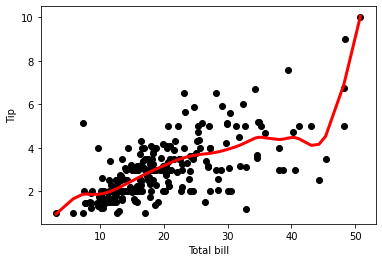

In [12]:

xsort = X[SortIndex][:,0] 
fig = plt.figure() 
ax = fig.add_subplot(1,1,1) 
ax.scatter(bill,tip, color='black') 
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=3) 
plt.xlabel('Total bill') 
plt.ylabel('Tip') 
plt.show();

In [18]:
import numpy as np 
from bokeh.plotting import figure, show, output_notebook 
from bokeh.layouts import gridplot 
from bokeh.io import push_notebook

In [19]:
def local_regression(x0, X, Y, tau):
    # add bias term 
    x0 = np.r_[1, x0] 
    # Add one to avoid the loss in information 
    X = np.c_[np.ones(len(X)), X] 
    # fit model: normal equations with kernel 
    xw = X.T * radial_kernel(x0, X, tau) # XTranspose * W 
    beta = np.linalg.pinv(xw @ X) @ xw @ Y #@ Matrix Multiplication or Dot Product
    return x0 @ beta # @ Matrix Multiplication or Dot Product for prediction

In [20]:

def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))
# Weight or Radial Kernal Bias Function

In [21]:
n = 1000
# generate dataset
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10]) 
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y:\n",Y[1:10])
# jitter X
X += np.random.normal(scale=.1, size=n) 
print("Normalised (10 Samples) X :\n",X[1:10])

domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10])


The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y:
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-3.06118242 -2.95155171 -3.03736103 -3.00669349 -3.04186648 -2.94519683
 -2.99143459 -2.83994579 -2.72407497]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


In [22]:
def plot_lwr(tau):
    # prediction through regression
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plot = figure(plot_width=400, plot_height=400) 
    plot.title.text='tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    return plot

show(gridplot([[plot_lwr(10.), plot_lwr(1.)],
[plot_lwr(0.1), plot_lwr(0.01)]]))